In [6]:
import numpy as np
import pandas as pd 

# data visualization
from matplotlib import pyplot as plt

# Algorithms
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [11]:
pulsar = pd.read_csv("pulsar_stars.csv", index_col = None)
print(pulsar)

        Mean of the integrated profile  \
0                           140.562500   
1                           102.507812   
2                           103.015625   
3                           136.750000   
4                            88.726562   
5                            93.570312   
6                           119.484375   
7                           130.382812   
8                           107.250000   
9                           107.257812   
10                          142.078125   
11                          133.257812   
12                          134.960938   
13                          117.945312   
14                          138.179688   
15                          114.367188   
16                          109.640625   
17                          100.851562   
18                          136.093750   
19                           99.367188   
20                          100.890625   
21                          105.445312   
22                           95.86

In [4]:
X = pulsar.iloc[:, :-1]
y = pulsar.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=234)

                                               Importance
Feature                                                  
 Skewness of the integrated profile              0.256641
 Excess kurtosis of the integrated profile       0.253172
 Mean of the integrated profile                  0.207800
 Mean of the DM-SNR curve                        0.075910
 Standard deviation of the DM-SNR curve          0.067417
 Excess kurtosis of the DM-SNR curve             0.049623
 Standard deviation of the integrated profile    0.049041
 Skewness of the DM-SNR curve                    0.040396


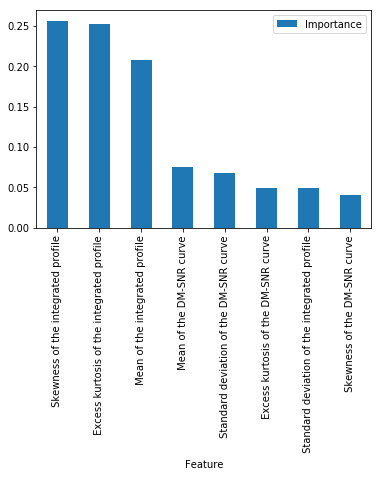

In [6]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
importances = pd.DataFrame({'Feature':pulsar.columns.drop('target_class'), 'Importance':rf.feature_importances_}).set_index('Feature')
importances = importances.sort_values('Importance', ascending=False)
print(importances)
importances.plot.bar()
plt.show()

In [2]:
X_train = X_train.drop(list(importances.index[-2:]), axis=1)
X_test = X_test.drop(list(importances.index[-2:]), axis=1)
rf.fit(X_train, y_train)
print("Model's accuracy after dropping weak features: ",rf.score(X_test, y_test))


NameError: name 'X_train' is not defined

In [8]:
rf_ft = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

rf_ft.fit(X_train, y_train)
print("Model's accuracy after tuning it: ",rf_ft.score(X_test, y_test))

Model's accuracy after tuning it:  0.9793296089385475


In [10]:
predictions = rf_ft.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)


[[4829   34]
 [  77  430]]
